In [ ]:
# Package installations
using CSV
using DataFrames
using Statistics
using LinearAlgebra
using Dates
using Plots

In [ ]:
# Part 2, q123, Minh

# Q1 
filepath = "./usconsumption.csv"
df = CSV.read(filepath, DataFrame)
df[!, :Intercept] = ones(size(df, 1)) # create an Intercept column and fill it with 1s.

print(df)


227×7 DataFrame
 Row │ Quarter   Percent Change Consumption  Percent Change Income   Percent Change Production   Percent Change Savings   Change Unemployment  Intercept 
     │ String7  Float64                      Float64                Float64                     Float64                  Float64               Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1960Q1                     0.947824               1.1825                      5.85456                  3.18329                     0.1        1.0
   2 │ 1960Q2                     1.26048                0.625615                   -2.19366                 -4.81376                     0.0        1.0
   3 │ 1960Q3                    -0.400781               0.176703                   -1.65811                  5.3346                      0.1        1.0
   4 │ 1960Q4                     0.126736              -0.0418

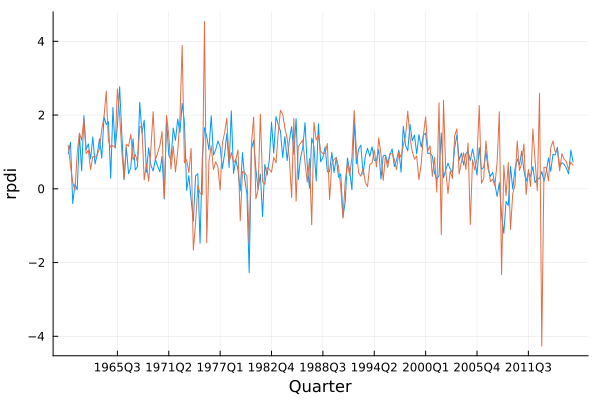

In [ ]:
# Q2
x = df[:, "Quarter"]
rpce = df[:, " Percent Change Consumption"]
rpdi = df[:, "Percent Change Income"]

plot(x, rpce, xlabel="Quarter", ylabel="RPCE", legend=false)
plot!(x, rpdi, xlabel="Quarter", ylabel="rpdi", legend=false)
